In [38]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

sns.set_theme()

In [39]:
spe_perm = np.loadtxt("./spe_perm.dat", dtype=float).reshape(
    3, 85, 220, 60
)  # Milli Darcy
spe_perm = spe_perm[0]  # Taking only the 0th component of the tensor
spe_perm *= 9.869233e-16  # To SI
spe_phi = np.loadtxt("./spe_phi.dat", dtype=float).reshape(85, 220, 60)

# Small model

In [40]:
perm_small = spe_perm[0, :120]
phi_small = spe_phi[0, :120]
print(perm_small.shape)
print(phi_small.shape)

np.save("spe10_l0_120_perm.npy", perm_small)
np.save("spe10_l0_120_phi.npy", phi_small)

(120, 60)
(120, 60)


In [41]:
perm_small.max()

3.967836304553e-12

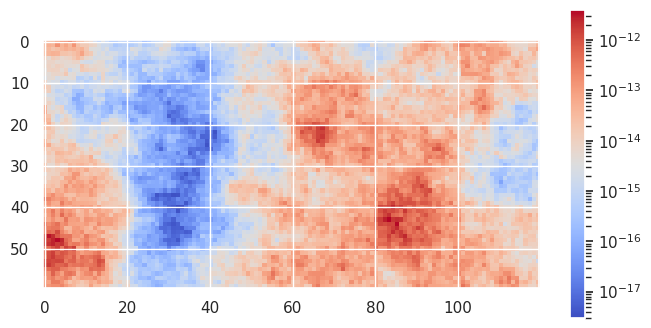

In [42]:
plt.figure(figsize=(8, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(perm_small.T, cmap=cm, norm=LogNorm())
plt.colorbar()

In [43]:
perm_small.min() * 1e6

2.9933383689000003e-12

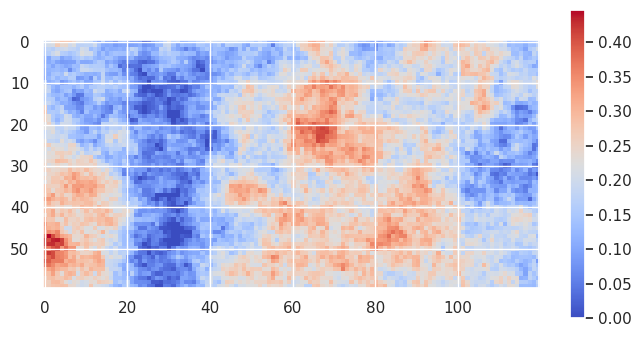

In [44]:
plt.figure(figsize=(8, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(phi_small.T, cmap=cm)
plt.colorbar()

# Medium model

In [45]:
perm_med = spe_perm[0]
phi_med = spe_phi[0]
print(perm_small.shape)
print(phi_small.shape)
np.save("spe10_l0_220_perm.npy", perm_med)
np.save("spe10_l0_220_phi.npy", phi_med)

(120, 60)
(120, 60)


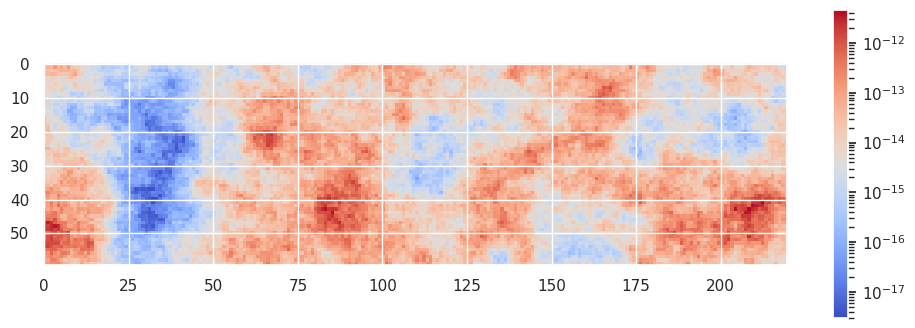

In [46]:
plt.figure(figsize=(12, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(perm_med.T, cmap=cm, norm=LogNorm())
plt.colorbar()

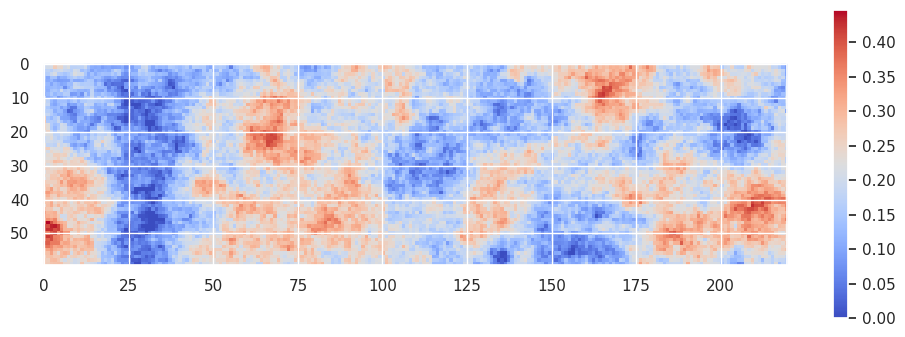

In [47]:
plt.figure(figsize=(12, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(phi_med.T, cmap=cm)
plt.colorbar()

# Large model

In [48]:
def mirrored(data):
    tmp = np.concatenate([data, data[::-1]], axis=0)
    return np.concatenate([tmp, tmp[:, ::-1]], axis=1)


perm_large = mirrored(perm_med)
phi_large = mirrored(phi_med)
np.save("spe10_l0_mirrored_perm.npy", perm_large)
np.save("spe10_l0_mirrored_phi.npy", phi_large)
print(perm_large.shape)
print(phi_large.shape)

(440, 120)
(440, 120)


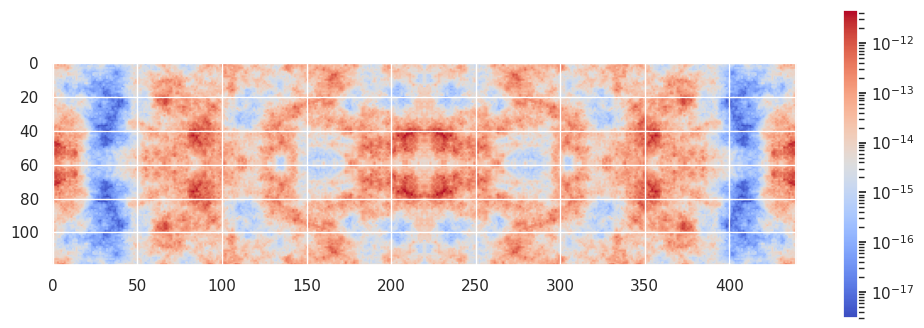

In [49]:
plt.figure(figsize=(12, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(perm_large.T, cmap=cm, norm=LogNorm())
plt.colorbar()
plt.show()

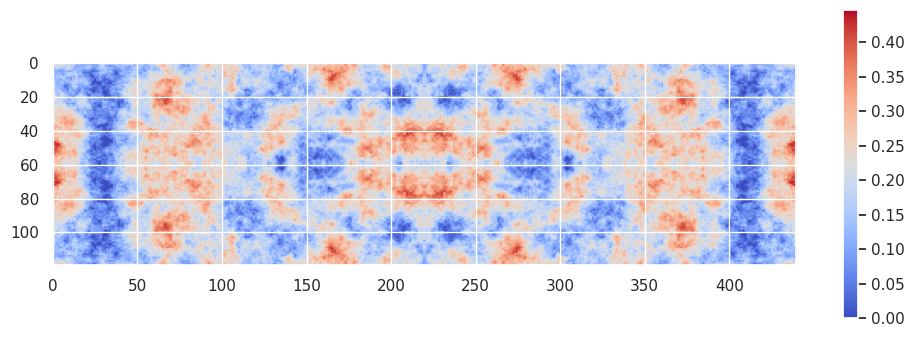

In [50]:
plt.figure(figsize=(12, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(phi_large.T, cmap=cm)
plt.colorbar()